### cluster evaluation using iris dataset

In [8]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# silhouette
from sklearn.metrics import silhouette_samples, silhouette_score # silhouette_score = np.mean(silhouette_samples())
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

# silhouete value for the all data
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() shape', score_samples.shape)
# silhouete value column
irisDF['silhouette_coeff']=score_samples

# averaging silhouette value
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('iris_data silhouette analysis score:', average_score)
irisDF.head(3)

silhouette_samples() shape (150,)
iris_data silhouette analysis score: 0.5528190123564091


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [9]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### Visualization of silhouette coefficients per cluster, and optimization of number of clusters

In [48]:
def visualize_silhouette(cluster_lists, X_features):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # number of input cluster number 
    n_cols = len(cluster_lists)
    # subplots with n_cols columns
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    # iteration for the cluster number list
    for ind, n_cluster in enumerate(cluster_lists):
        # KMeans clustering and silhouette evaluation
        clusterer = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster:'+str(n_cluster)+'\nSilhouette Score:'+str(round(sil_avg, 3)))
        axs[ind].set_xlabel('The silhouette coefficient values')
        axs[ind].set_ylabel('Cluster label')
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features)+(n_cluster+1)*10]) # considering gap between plots
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # barplot per cluster
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i # plot location
            
            color = cm.nipy_spectral(float(i)/n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower+0.5*size_cluster_i, str(i))
            y_lower=y_upper+10
        
        axs[ind].axvline(x=sil_avg, color='red', linestyle='--')

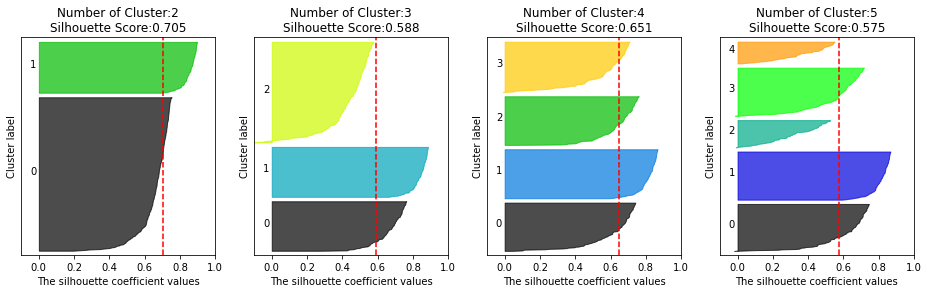

In [49]:
# 4 cluster centers, 2 dimensional data creation using make_blobs
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 500, n_features=2, centers=4, cluster_std=1, 
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

visualize_silhouette([2,3,4,5], X)

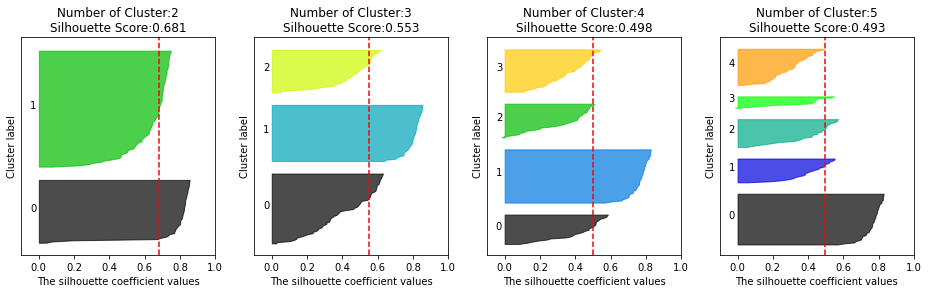

In [50]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([2,3,4,5], iris.data)